<font size="5">Fatal Police Shootings in the US (2015-2020)</font> 

This project is an analysis of the dataset of every fatal shooting in the US since Jan 1st, 2015 by The Washington Post. The Post began tracking more than a dozen details about each killing by culling local news reports, law enforcement websites and social media and by monitoring independent databases such as Killed by Police and Fatal Encounters.
The available features are:

- Race of the deceased;
- Circumstances of the shooting;
- Whether the person was armed;
- Whether the victim was experiencing a mental-health crisis;
- Among others.

In 2016, The Post is gathering additional information about each fatal shooting that occurs this year and is filing open-records requests with departments. More than a dozen additional details are being collected about officers in each shooting.

Link to the dataset: https://www.kaggle.com/andrewmvd/police-deadly-force-usage-us

<font size="4">Importing libraries and Inspection</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Importing the dataset
df = pd.read_csv('fatal-police-shootings-data.csv')

In [3]:
# Checking the head of the dataset
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5338 non-null   int64  
 1   name                     5338 non-null   object 
 2   date                     5338 non-null   object 
 3   manner_of_death          5338 non-null   object 
 4   armed                    5098 non-null   object 
 5   age                      5089 non-null   float64
 6   gender                   5336 non-null   object 
 7   race                     4731 non-null   object 
 8   city                     5338 non-null   object 
 9   state                    5338 non-null   object 
 10  signs_of_mental_illness  5338 non-null   bool   
 11  threat_level             5338 non-null   object 
 12  flee                     5088 non-null   object 
 13  body_camera              5338 non-null   bool   
dtypes: bool(2), float64(1), 

<font size="4">Data Cleansing</font>

In [5]:
# Checking null values in every column
df.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                      True
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [6]:
# fill null values with Unspecified except the age column (I will explain it later)
df[['armed', 'gender', 'race', 'flee']] = df[['armed', 'gender', 'race', 'flee']].fillna(value='Unspecified')

In [7]:
df.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                         True
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5338 non-null   int64  
 1   name                     5338 non-null   object 
 2   date                     5338 non-null   object 
 3   manner_of_death          5338 non-null   object 
 4   armed                    5338 non-null   object 
 5   age                      5089 non-null   float64
 6   gender                   5338 non-null   object 
 7   race                     5338 non-null   object 
 8   city                     5338 non-null   object 
 9   state                    5338 non-null   object 
 10  signs_of_mental_illness  5338 non-null   bool   
 11  threat_level             5338 non-null   object 
 12  flee                     5338 non-null   object 
 13  body_camera              5338 non-null   bool   
dtypes: bool(2), float64(1), 

<font size="4">Feature Engineering</font>

Race characterisation

In [9]:
def race(data):
    if data == 'W':
        return 'White'
    elif data == 'B':
        return 'Black'
    elif data == 'H':
        return 'Hispanic'
    elif data == 'A':
        return 'Asian'
    elif data == 'N':
        return 'Native'
    elif data == 'O':
        return 'Other'
    return 'Unspecified'

In [10]:
df['race'] = df['race'].apply(race)

Gender characterisation

In [11]:
def gender(data):
    if data == 'M':
        return 'Male'
    elif data == 'F':
        return 'Female'
    return 'Unspecified'

In [12]:
df['gender'] = df['gender'].apply(gender)

Splitting the month and year in the date column values then create new columns for the splitted values

In [13]:
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [14]:
time = pd.to_datetime(df['date'])

In [15]:
df['month'] = time.apply(lambda m: m.month).map(month_map)
df['year'] = time.apply(lambda y: y.year)

Grouping age based on the generation's name

In [16]:
def group_age(data):
    if data <= 9:
        return 'Gen A / Alpha'
    elif data > 9 and data <= 24:
        return 'Gen Z / Zoomers'
    elif data > 24 and data <= 40:
        return 'Gen Y / Millenials'
    elif data > 40 and data <= 56:
        return 'Gen X'
    elif data > 56:
        return 'Baby Boomers'
    return 'Unspecified'

In [17]:
df['generation'] = df['age'].apply(group_age)

State characterisation

In [18]:
# Creating the state's name for mapping
state = {'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'ID': 'Idaho',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NH': 'New Hampshire',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VT': 'Vermont',
        'VA': 'Virginia',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'}

In [19]:
# Renaming the column 'state' to 'code'
df.rename(columns={'state':'code'}, inplace=True)

In [20]:
# Mapping the state code into state name and put it in the new 'state' column
df['state'] = df['code'].map(state)

Checking the head of the dataset after feature engineering

In [21]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,code,signs_of_mental_illness,threat_level,flee,body_camera,month,year,generation,state
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,True,attack,Not fleeing,False,Jan,2015,Gen X,Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,False,attack,Not fleeing,False,Jan,2015,Gen X,Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False,Jan,2015,Gen Z / Zoomers,Kansas
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,True,attack,Not fleeing,False,Jan,2015,Gen Y / Millenials,California
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False,Jan,2015,Gen Y / Millenials,Colorado


<font size="4">Exploratory Data Analysis</font>

Top 10 Fatal Police Shootings by state

Text(0.5, 1.0, 'Top 10 Fatal Police Shootings by State')

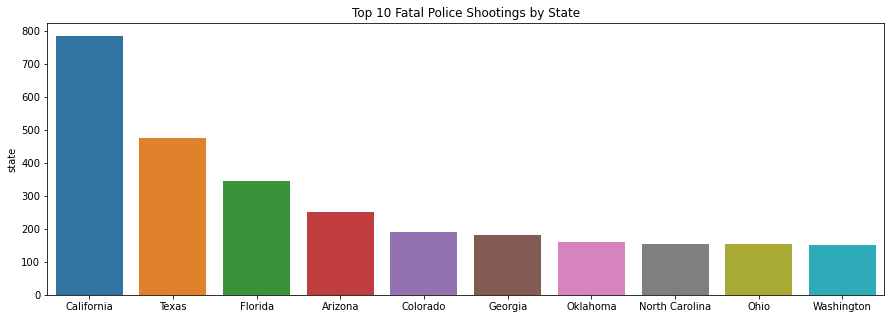

In [22]:
top_states = df['state'].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_states.index, y=top_states)
plt.title('Top 10 Fatal Police Shootings by State')

Top 10 Fatal Police Shootings by Item

Text(0.5, 1.0, 'Top 10 Fatal Police Shootings by Item')

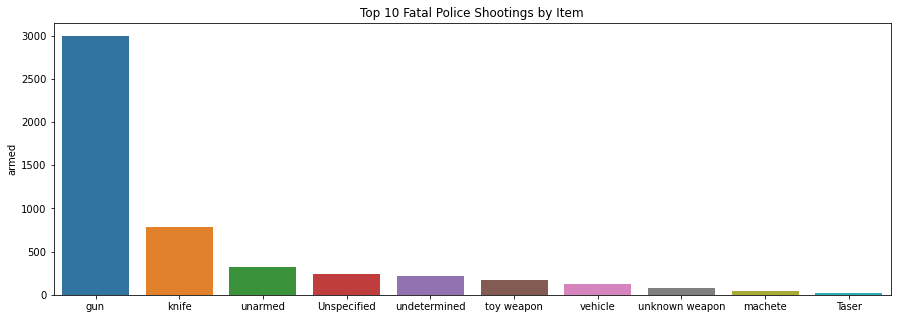

In [23]:
top_items = df['armed'].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_items.index, y=top_items)
plt.title('Top 10 Fatal Police Shootings by Item')

Fatal Police Shootings by Gender

Text(0.5, 1.0, 'Fatal Police Shootings by Gender')

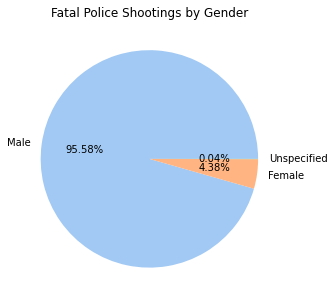

In [24]:
colors = sns.color_palette('pastel')[0:5]
gender_count = df['gender'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(gender_count, labels = gender_count.index, colors = colors, autopct='%1.2f%%')
plt.title('Fatal Police Shootings by Gender')

Fatal Police Shootings by Race

Text(0.5, 1.0, 'Fatal Police Shootings by Race')

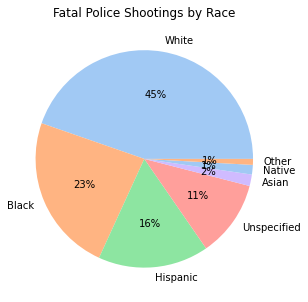

In [25]:
colors = sns.color_palette('pastel')[0:5]
race = df['race'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(race, labels = race.index, colors = colors, autopct='%.0f%%')
plt.title('Fatal Police Shootings by Race')

Fatal Police Shootings by Manner of death

Text(0.5, 1.0, 'Fatal Police Shootings by Manner of death')

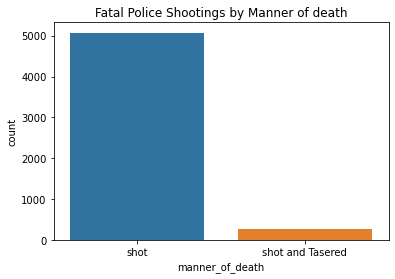

In [26]:
sns.countplot(x='manner_of_death',data=df)
plt.title('Fatal Police Shootings by Manner of death')

Fatal Police Shootings by Mental Illness

Text(0.5, 1.0, 'Fatal Police Shootings by Mental Illness')

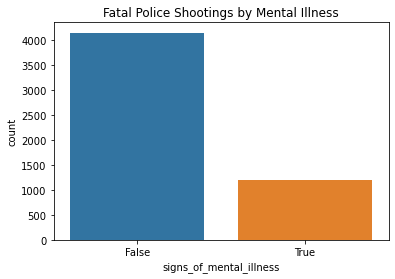

In [27]:
sns.countplot(x='signs_of_mental_illness',data=df)
plt.title('Fatal Police Shootings by Mental Illness')

Fatal Police Shootings by Threat Level

Text(0.5, 1.0, 'Fatal Police Shootings by Threat Level')

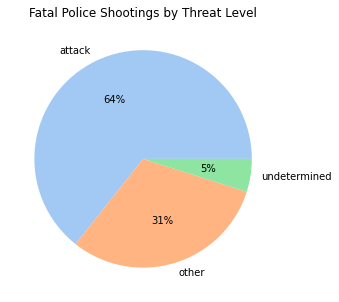

In [28]:
threat_level = df['threat_level'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(threat_level, labels = threat_level.index, colors = colors, autopct='%.0f%%')
plt.title('Fatal Police Shootings by Threat Level')

Fatal Police Shootings by Flee

Text(0.5, 1.0, 'Fatal Police Shootings by Flee')

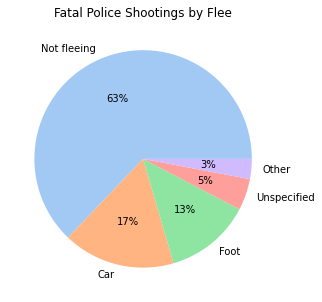

In [29]:
flee = df['flee'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(flee, labels = flee.index, colors = colors, autopct='%.0f%%')
plt.title('Fatal Police Shootings by Flee')

Fatal Police Shootings by Body Camera

Text(0.5, 1.0, 'Fatal Police Shootings by Body Camera')

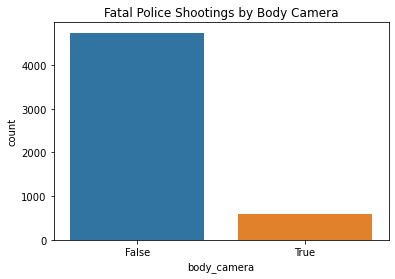

In [30]:
sns.countplot(x='body_camera',data=df)
plt.title('Fatal Police Shootings by Body Camera')

Fatal Police Shootings by Generation

Text(0.5, 1.0, 'Fatal Police Shootings by Generation')

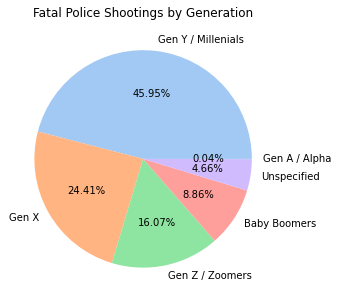

In [31]:
generation = df['generation'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(generation, labels = generation.index, colors = colors, autopct='%1.2f%%')
plt.title('Fatal Police Shootings by Generation')

<font size="4">Monthly and Yearly Analysis of the Fatal Police Shootings in the US</font>

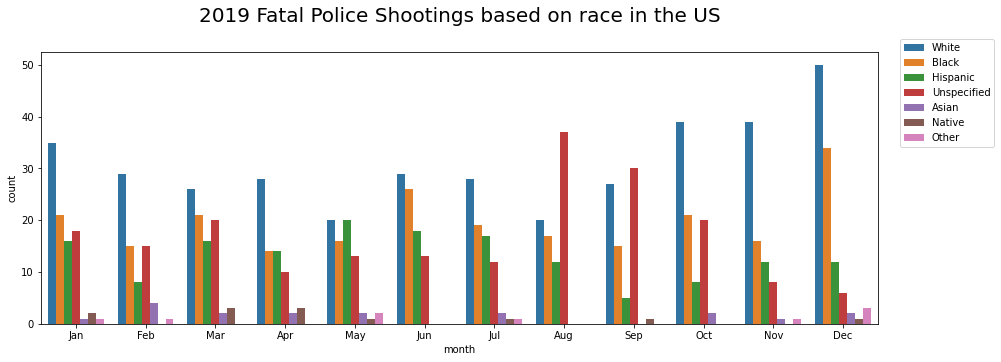

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(x='month',data=df[df['year'] == 2019],hue='race')
plt.title('2019 Fatal Police Shootings based on race in the US',loc='center',pad=30, fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.85))

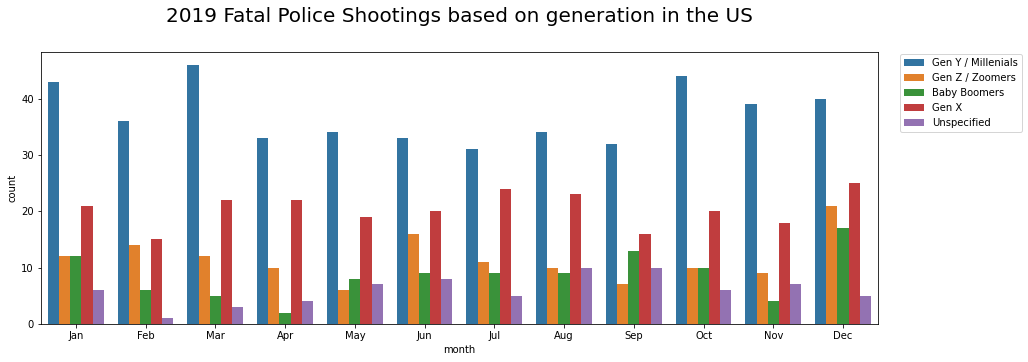

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x='month',data=df[df['year'] == 2019],hue='generation')
plt.title('2019 Fatal Police Shootings based on generation in the US',loc='center',pad=30, fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.85))

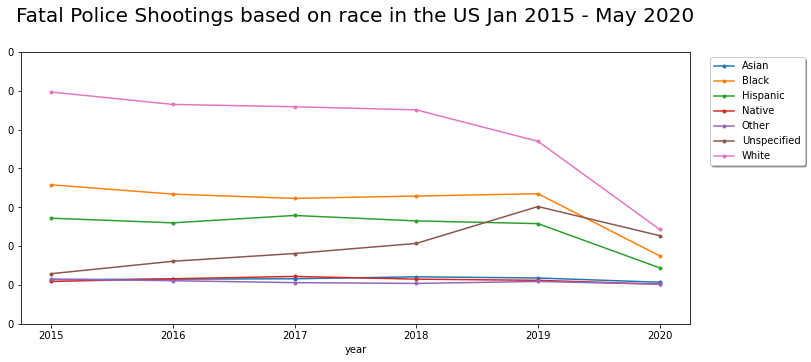

In [117]:
df.groupby(['year','race'])['id'].count().unstack().plot(marker='.')
plt.title('Fatal Police Shootings based on race in the US Jan 2015 - May 2020',loc='center',pad=30, fontsize=20)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)

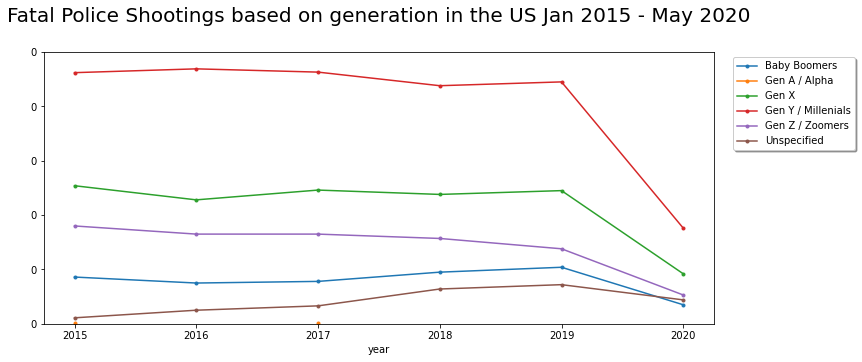

In [122]:
df.groupby(['year','generation'])['id'].count().unstack().plot(marker='.')
plt.title('Fatal Police Shootings based on generation in the US Jan 2015 - May 2020',loc='center',pad=30, fontsize=20)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.12, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)

<AxesSubplot:xlabel='year', ylabel='month'>

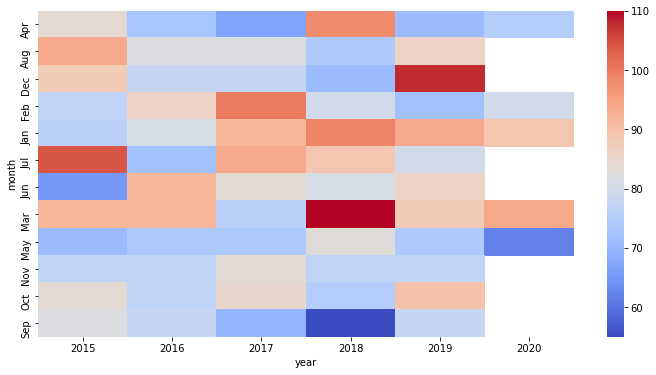

In [114]:
# Heatmap of Fatal Police Shootings the US Jan 2015 - May 2020
count_case = df.groupby(by=['month','year']).count()['date'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(count_case, cmap='coolwarm')

<font size="4">Geographical Plotting</font>

In [38]:
states = df.groupby(['code', 'state'])['id'].count().reset_index()
states.rename(columns={'id':'cases'}, inplace=True)
states

,code,state,cases
0,AK,Alaska,39
1,AL,Alabama,102
2,AR,Arkansas,80
3,AZ,Arizona,251
4,CA,California,784
5,CO,Colorado,191
6,CT,Connecticut,21
7,DC,District of Columbia,13
8,DE,Delaware,13
9,FL,Florida,344


In [112]:
# Created the choropleth map
fig = px.choropleth(states,
                    locations='code',
                    color='cases',
                    color_continuous_scale='spectral_r',
                    hover_name='state',
                    locationmode='USA-states',
                    labels = {'cases':'Total Cases'},
                    scope='usa')

fig.update_layout(title_text='Fatal Police Shootings in the US Jan 2015 - May 2020', title_x=0.5)

fig.show()

In [113]:
# Added name of every states in the choropleth map
fig.add_scattergeo(
    locations=states['code'],
    locationmode='USA-states',
    text=states['code'],
    mode='text')

fig.show()

In [116]:
# Export it to png file
fig.write_image("fig.png", height=1080, width=1920)